# <font color="navy"> L3 Investigate
    
* Quickly check the L3. 


In [1]:
%matplotlib inline
import os
import math
import h5py

import numpy as np


In [4]:
fdata_dict ={
    'B_r1'   : '/Users/swasti/code/test_temp/multi_hit/Beam_r1_5MeV/2022-04-25_1650913642_5MeVBeam_1hour_Tracker_L3.h5',
    'PB_r85' : '/Users/swasti/code/test_temp/multi_hit/PreBeam_r85_Cs137/1649092713_Apr4_Cs137_Mode7C_L3.h5',
    'S_2mev' : '/Users/swasti/code/test_temp/multi_hit/sim_2meV/TKR_2MeVBeam-100000Trig.inc1.id1_sim.L3.h5',
    'it_cs137' :'/Users/swasti/code/test_temp/r179_Cs137_20min_old/2023-02-07_1631_9Layers_Cs137_L3.h5',
}


In [6]:
fname = fdata_dict['it_cs137']
file = h5py.File(fname,'r')

In [7]:
file.keys()

<KeysViewHDF5 ['tracker']>

In [8]:
file['tracker'].keys()

<KeysViewHDF5 ['energy', 'event_id', 'event_time', 'pulse_height']>

In [9]:
file['tracker/energy']

<HDF5 dataset "energy": shape (110664, 10, 2, 192), type "<f8">

# Test


In [10]:
temparr1 = np.array([[0,1,2,3,5],[2,1,2,3,5],[4,1,6,7,8],[4,2,6,7,8],[4,3,6,7,8],[5,5,5,7,8],[6,6,6,7,8]])
temparr2 = np.array([0,2])
temparr1

array([[0, 1, 2, 3, 5],
       [2, 1, 2, 3, 5],
       [4, 1, 6, 7, 8],
       [4, 2, 6, 7, 8],
       [4, 3, 6, 7, 8],
       [5, 5, 5, 7, 8],
       [6, 6, 6, 7, 8]])

In [11]:
temparr1[temparr2,:]

array([[0, 1, 2, 3, 5],
       [4, 1, 6, 7, 8]])

In [12]:
test = temparr1[:,0]
test

array([0, 2, 4, 4, 4, 5, 6])

In [13]:
j = np.where(temparr1[:,0] == 4)
j

(array([2, 3, 4]),)

In [14]:
j[0]

array([2, 3, 4])

In [46]:
def get_trk_hit(hitinfo):
    temp_ene = []
    temp_x = []
#     print(hitinfo.shape)
    for k in range (hitinfo.shape[0]):
        temp_ene.append(hitinfo[k,3])
        temp_x.append(hitinfo[k,1])
    
    return temp_ene,temp_x


for i in range(7):
    j = np.where(temparr1[:,0] == i)
    hitnrg, hitx = get_trk_hit(temparr1[j[0]])
    print(hitnrg)
    print(hitx)

[3]
[1]
[]
[]
[3]
[1]
[]
[]
[7, 7, 7]
[1, 2, 3]
[7]
[5]
[7]
[6]


In [47]:
fname = fdata_dict['it_cs137']
file = h5py.File(fname,'r')

In [48]:
nrg = file['tracker/energy'][...]
nrg.shape

(110664, 10, 2, 192)

In [49]:
Trk_nrg_sum_arr = nrg.sum(axis = tuple(range(1,4)) )

In [53]:
import matplotlib.pyplot as plt

nrg_list =[]
for i in range(nrg.shape[0]):

    nsum = np.sum(nrg[i,:,:,:])/2.0
    nrg_list.append(float(nsum))


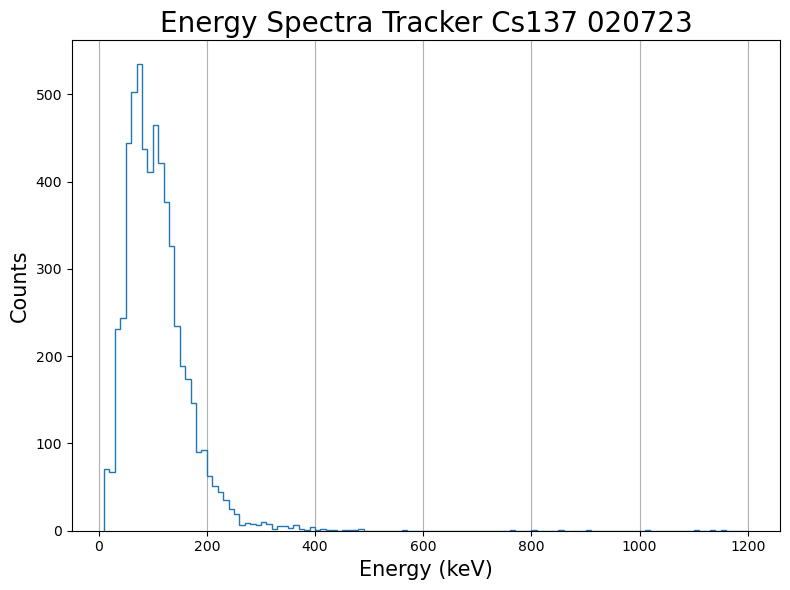

In [54]:
e_min = 10.0 
e_max = 1200.0
bin_width = 10.00
n_bins = int((e_max-e_min)/bin_width)
n_bins

plt.rcParams["figure.figsize"] = [8, 6]
tot_hist, a, b = plt.hist(np.array(nrg_list), bins=n_bins, range=(e_min, e_max),histtype = 'step')
plt.xlabel('Energy (keV)', fontsize='15')
plt.ylabel('Counts', fontsize='15')
plt.title(f'Energy Spectra Tracker Cs137 020723',fontsize='20')
#plt.xlim(xlim_min/1000.0,1.2)
#plt.xlim(0,7000)

plt.tight_layout()
plt.grid(axis = 'x')
#plt.xticks(np.arange(0,xlim_max/1000.0,0.5))
plt.savefig(f"TRK_L3_Cs137a.jpeg")

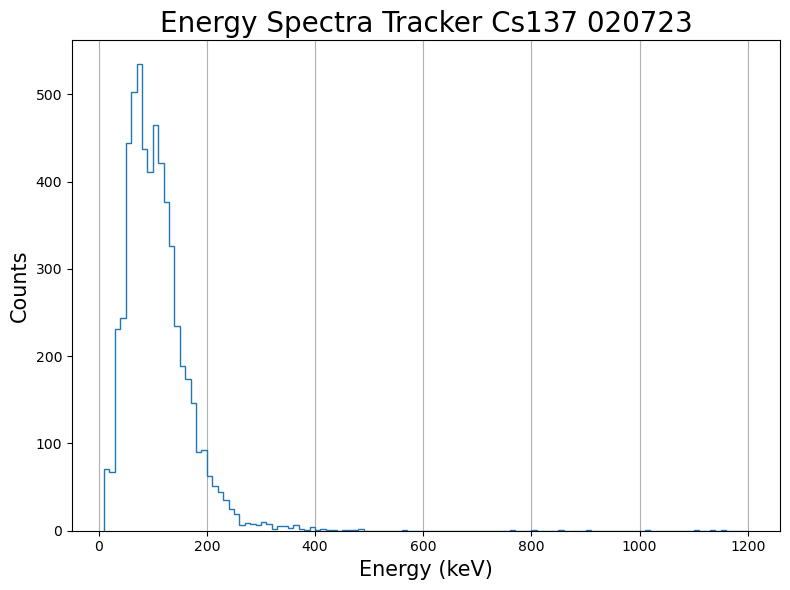

In [55]:
e_min = 10.0 
e_max = 1200.0
bin_width = 10.00
n_bins = int((e_max-e_min)/bin_width)
n_bins

temp_nrg_sum_arr = np.array(Trk_nrg_sum_arr)/2.0
plt.rcParams["figure.figsize"] = [8, 6]
tot_hist, a, b = plt.hist(np.array(temp_nrg_sum_arr), bins=n_bins, range=(e_min, e_max),histtype = 'step')
plt.xlabel('Energy (keV)', fontsize='15')
plt.ylabel('Counts', fontsize='15')
plt.title(f'Energy Spectra Tracker Cs137 020723',fontsize='20')
#plt.xlim(xlim_min/1000.0,1.2)
#plt.xlim(0,7000)

plt.tight_layout()
plt.grid(axis = 'x')